In [1]:
%reset -f
from pythonrc import *

In [2]:
time_step = 1.0

actuators = [ma_aft_port, ma_aft_starboard, ma_bow_port, ma_bow_starboard]
force_torque_components = [
    skadipy.allocator.ForceTorqueComponent.X,
    skadipy.allocator.ForceTorqueComponent.Y,
    skadipy.allocator.ForceTorqueComponent.N,
]

allocators = []
allocators.append(skadipy.allocator.QuadraticProgramming(
    actuators=actuators, force_torque_components=force_torque_components
))


c:\Users\emirc\miniconda3\envs\sandbox\Lib\site-packages\qpsolvers\conversions\ensure_sparse_matrices.py:24: UserWarning: Converted P to scipy.sparse.csc.csc_matrix
For best performance, build P as a scipy.sparse.csc_matrix rather than as a numpy.ndarray
  warnings.warn(
c:\Users\emirc\miniconda3\envs\sandbox\Lib\site-packages\qpsolvers\conversions\ensure_sparse_matrices.py:24: UserWarning: Converted A to scipy.sparse.csc.csc_matrix
For best performance, build A as a scipy.sparse.csc_matrix rather than as a numpy.ndarray
  warnings.warn(


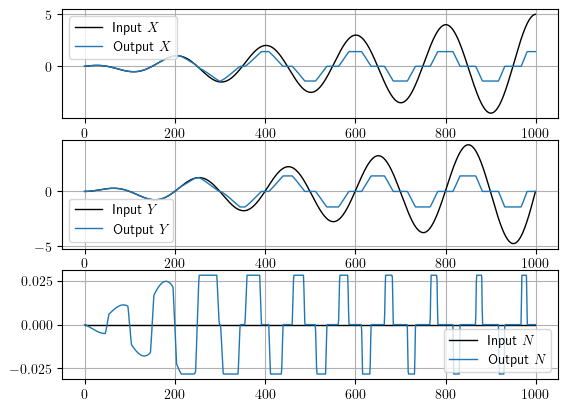

In [3]:
data = generate_spiral_dataset(
    num_points=1000,
    num_turns=5,
    k=5,
)

tau_cmd = np.concatenate(
    (data, np.zeros((np.shape(data)[0], 4))),
    axis=1
)
d_tau_cmd = np.gradient(tau_cmd, axis=0) / time_step

xi_hist, theta_hist, tau_hist = run_tests(tau_cmd=tau_cmd, d_tau_cmd=d_tau_cmd, allocators=allocators)
plot_histories(tau_cmd=tau_cmd, tau_alloc=tau_hist)

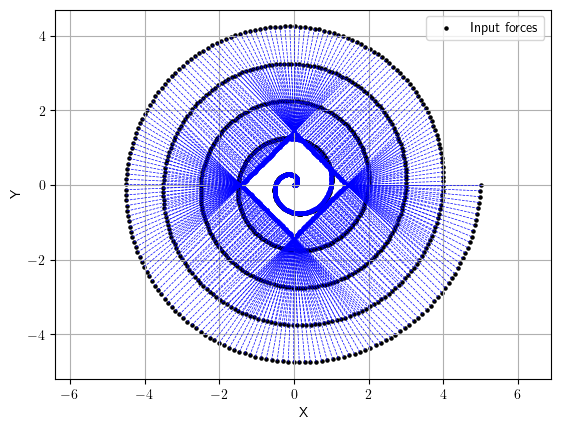

In [4]:
plot_2d_allocation(tau_cmd=tau_cmd, allocators=allocators, tau_hist=tau_hist)

plt.grid(True)
plt.axis('equal')
plt.legend()
plt.xlabel("X")
plt.ylabel("Y")
plt.show()

In [5]:
# angles = []
# for control_input in xi_all:
#     a = np.empty((len(control_input), 2))
#     for i, u in enumerate(control_input):
#         a2 = np.arctan2(u[2], u[1])
#         a3 = np.arctan2(u[4], u[3])
#         a[i] = np.array([a3])
#     angles.append(a)

# for _, angle in enumerate(angles):
#     angle[0:3,0] = None

# plt.clf()
# for _, angle in enumerate(angles):
#     plt.plot(np.degrees(angle[:,0]))
#     # plt.plot(np.degrees(np.unwrap(angle[:,0])))
#     pass


# l = []
# for i in lambda_p:
#     l.append(f"$\lambda = {i}$")

# plt.legend(l)
# # plt.plot(np.unwrap(angles[3][:,0]))
# plt.grid(True)

In [6]:
# save_mat(
#     filename="data/17.mat",
#     inputs=tau,
#     xi=xi_all,
#     thetas=theta_all,
#     outputs=allocated,
#     rho=rho,
#     gamma=gamma,
#     mu=mu,
#     lambda_p=lambda_p,
#     thruster=voithschneider_port
# )

In [7]:
# max(max(allocated[0][:,0]), -min(allocated[0][:,0]))

In [8]:
# np.size(tau)